# Linear Regression Model From Scratch

### Importing the necessary modules

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

### Creating the necessary functions

In [13]:

def create_dataset(n_points, variance, tan=2, correlation=False):
    """
    Creates a pseudo-random dataset based on number of points, variance, tangent of the line 
    and trend (positive or negative)
    """
    
    val = 1  # Initial y value                                               
    ys = []  # List to store all generated y values                                               
    for i in range(n_points):
        y = val + random.randrange(-variance,variance) # Loop through every point and add random variance
        ys.append(y)
        if correlation and correlation == 'pos':
            val+= tan
        elif correlation and correlation == 'neg':
            val -=tan
    
    xs = [i for i in range(len(ys))]
    return np.array(xs), np.array(ys) # Return dataset of X and Y values

In [14]:
def best_fit_slope_and_intercept(xs,ys):
    """
    Find the best line that correspond to the Data Set
    """
    m = (mean(xs) * mean(ys) - mean(xs*ys)) / (mean(xs)**2 - mean((xs)**2)) # Slope
    b = mean(ys) - m*mean(xs) # Intercept

    return m, b

In [15]:
def squared_error(ys_orig, ys_line):
    """
    Calculates the squared error of two lists of same size
    """
    return sum((ys_line-ys_orig)**2)

In [16]:
def coefficient_of_determination(ys_orig,ys_line):
    """
    Calculates the R Squared coefficient of the Linear Regression
    """
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [17]:
def predict(xs,m,b):
    """
    Predicts a y value for every x based on the slope m and the intercept b
    """
    ys = []
    for x in xs:
        ys.append(m*x+b)
    
    return np.array(ys)

### Creating the Data Set

In [23]:
n_points = 50
variance = 20
tan = 3
correlation = 'pos'

xs,ys = create_dataset(n_points,variance,tan,correlation)

### Finding the best curve via Linear Regression

In [24]:
m,b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x) + b for x in xs]

### Predicting some values

In [43]:
x_predict = [0,5,10,15,20]
y_predict = predict(x_predict,m,b)

### Caculating R Squared

In [26]:
r_squared = coefficient_of_determination(ys, regression_line)

### Plotting the Results

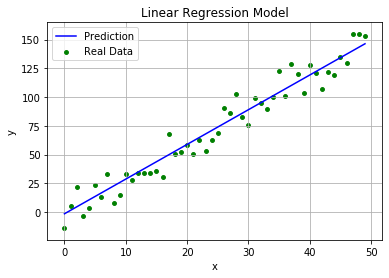

In [49]:
plt.plot(xs,regression_line, color = 'b')
plt.scatter(xs,ys, color = 'g', s = 15)
plt.legend(['Prediction', 'Real Data'])
plt.title('Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()